In [1]:
#hide
from fastai.vision.all import *
#from fastbook import *

matplotlib.rc('image', cmap='Greys')

#buiding a simple synthentic model
Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time. If you were measuring the speed manually every second for 20 seconds, it might look something like this:

In [ ]:
time = torch.arange(0,20).float()
time


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

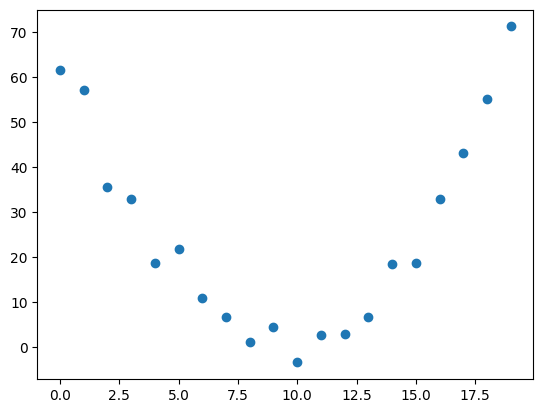

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [ ]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
def mse(preds, targets): return ((preds-targets)**2).mean()


#Step 1: Initialize the parameters


In [ ]:
params = torch.randn(3).requires_grad_()


In [ ]:
params

tensor([-1.3988, -1.9551,  0.0058], requires_grad=True)

In [ ]:
params.data

tensor([-1.3988, -1.9551,  0.0058])

In [ ]:
#hide
orig_params = params.clone()

In [ ]:
orig_params

tensor([-1.3988, -1.9551,  0.0058], grad_fn=<CloneBackward0>)

#Calculate the predictions...
The thing is that for most problem , they would have given us the y_preds, but in this question, they only gave us the the function to find the y_preds

In [ ]:
preds = f(time, params)

#Lets see how our current weights are doing.

In [ ]:
def show_preds(preds):
  plt.scatter(time , speed)
  plt.scatter(time, to_np(preds), color = 'red')




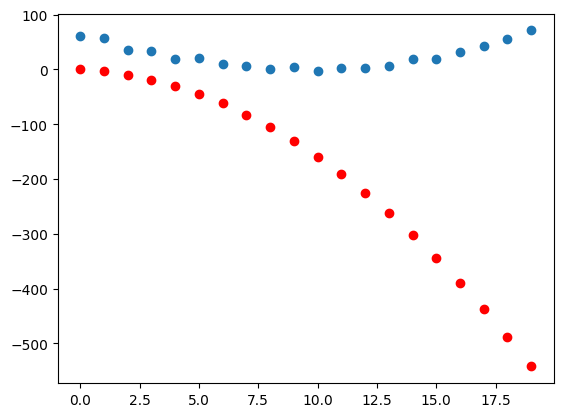

In [ ]:
show_preds(preds)

#calculate loss

In [ ]:
loss = mse(preds, speed)
loss

tensor(78081.8906, grad_fn=<MeanBackward0>)

#Our goal is now to improve this. To do that, we'll need to know the gradients.
#differentiating



In [ ]:
loss.backward()

In [ ]:
params.grad

tensor([-93371.8828,  -6014.1250,   -432.3782])

In [ ]:
params.grad * 1e-5


tensor([-0.9337, -0.0601, -0.0043])

In [ ]:
params

tensor([-1.3988, -1.9551,  0.0058], requires_grad=True)

#Step 5: Step the weights.


In [ ]:
lr = 1e-5
params.data -= lr* params.grad.data
params.grad = None

#Let's see if the loss has improved:
since we have a new params , lets see what our predictions are now



In [ ]:
preds = f(time, params)
preds

tensor([ 1.0083e-02, -2.3499e+00, -5.6400e+00, -9.8602e+00, -1.5011e+01,
        -2.1091e+01, -2.8101e+01, -3.6042e+01, -4.4913e+01, -5.4714e+01,
        -6.5445e+01, -7.7106e+01, -8.9697e+01, -1.0322e+02, -1.1767e+02,
        -1.3305e+02, -1.4936e+02, -1.6660e+02, -1.8478e+02, -2.0388e+02],
       grad_fn=<AddBackward0>)

In [ ]:
def show_preds(preds):
  plt.scatter(time, speed)
  plt.scatter(time, to_np(preds), color = 'red')

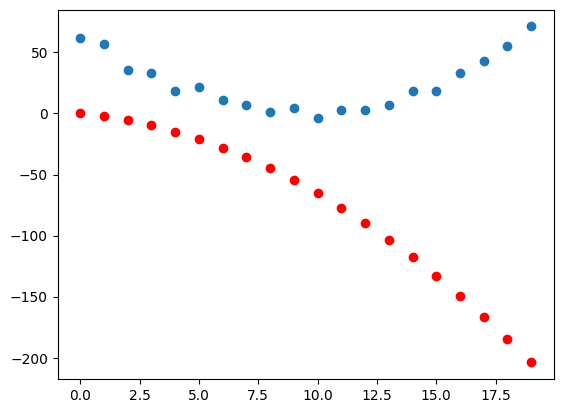

In [ ]:
show_preds(preds)

#We need to repeat this a few times, so we'll create a function to apply one step:



In [ ]:
def apply_step(params , prn =True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  lr = 1e-5
  params.data -=  lr*params.grad.data
  params.grad = None
  if prn : print(loss.item())
  return preds



In [ ]:
for i in range(60):
  apply_step(params)

15266.896484375
3380.3828125
1131.083251953125
705.4391479492188
624.886474609375
609.6356201171875
606.7418212890625
606.1865234375
606.0735473632812
606.0443725585938
606.0311279296875
606.0206909179688
606.010986328125
606.0012817382812
605.9915771484375
605.9820556640625
605.9723510742188
605.9627685546875
605.9531860351562
605.943603515625
605.9339599609375
605.9244384765625
605.9147338867188
605.9051513671875
605.8956298828125
605.8858642578125
605.8762817382812
605.8667602539062
605.8571166992188
605.8475341796875
605.8380126953125
605.8284301757812
605.8187255859375
605.8092041015625
605.7996826171875
605.7901000976562
605.7805786132812
605.7709350585938
605.7613525390625
605.7518310546875
605.7422485351562
605.7326049804688
605.72314453125
605.7135009765625
605.7039794921875
605.6943969726562
605.6847534179688
605.67529296875
605.6656494140625
605.6561279296875
605.6466064453125
605.6370849609375
605.6275634765625
605.6179809570312
605.6085205078125
605.5989990234375
605.58935

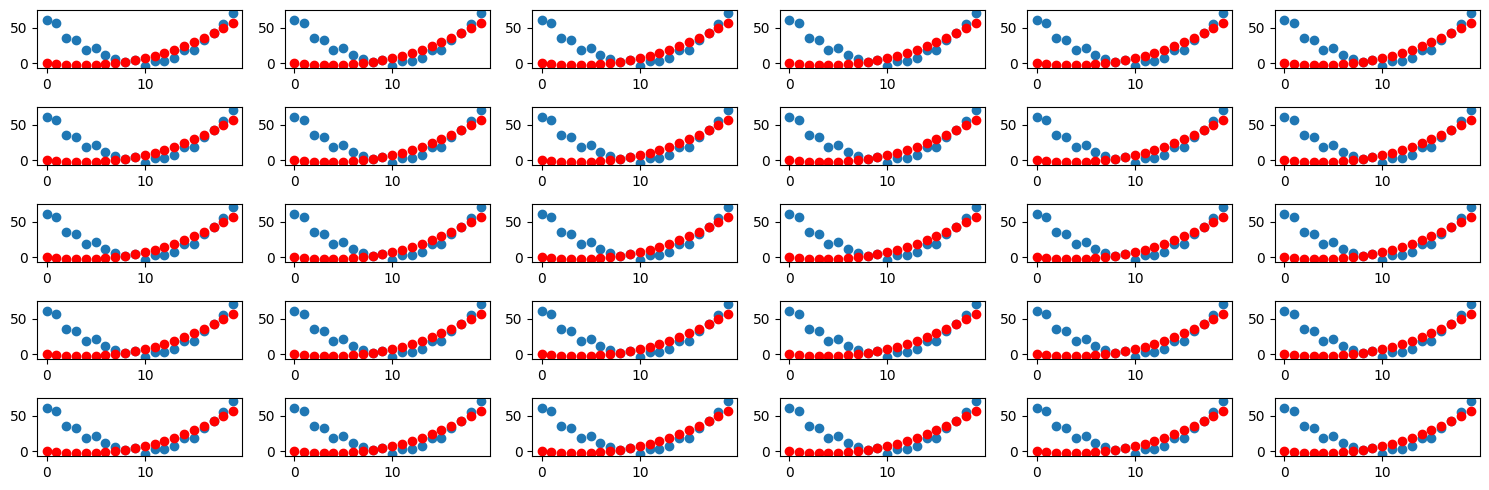

In [ ]:
fig, axs = plt.subplots(5, 6, figsize=(15, 5))  # Create a 5x6 grid of subplots

for row in axs:  # Iterate through rows
    for ax in row:  # Iterate through each axis in the row
        plt.sca(ax)  # Set the current axis to `ax`
        show_preds(apply_step(params, False))  # Call show_preds without passing ax

plt.tight_layout()  # Prevent overlapping


#My own example practice
Teaching my student

In [ ]:
#Lets say we want to model a phenomenon that correlates x and y
#Truth is that we have an idea how y might look like wrt to x

x = torch.arange(0,40, 2).float() ; x

tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30., 32., 34., 36., 38.])

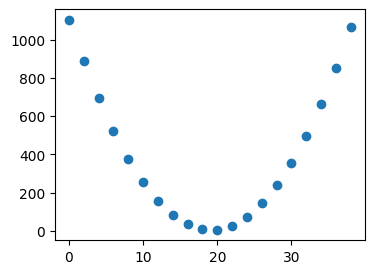

In [ ]:
#based on what we have noticed in reality
#so invariably , this is our true predictions for y
y = 3*(x-20)**2 + 5*(x-20) + 5
plt.figure(figsize=(4,3))
plt.scatter(x, y)

In [ ]:
#so then lets define how we get the y_preds, technically , I am saying that is my function for the y_pred
#since pytorch will bring me random parameters and x is already known.

def f(params, x):
  a, b, c = params
  return a * (x**2) + b*x + c

In [ ]:
#the next thing I need to define is the loss function

def mse(preds, target):
  return ((preds-target)**2).mean()


#step 1 : Initialize the parameters

In [ ]:
#in any deep learning project, this is the first thing you do!
#how can you not do this!
#luckily pytorch can help us with this!

params = torch.randn(3).requires_grad_()


In [ ]:
params

tensor([ 0.0507, -1.0556,  1.5425], requires_grad=True)

In [ ]:
params.data

tensor([ 0.0507, -1.0556,  1.5425])

#step 2: calculate the predictions

In [ ]:
preds =  f(params, x)
preds

tensor([ 1.5425, -0.3660, -1.8690, -2.9664, -3.6584, -3.9448, -3.8257, -3.3011,
        -2.3710, -1.0353,  0.7058,  2.8525,  5.4047,  8.3624, 11.7257, 15.4944,
        19.6687, 24.2484, 29.2337, 34.6246], grad_fn=<AddBackward0>)

#step 4 : calculate the loss

In [ ]:
#just for curiosity's sake
y

tensor([1105.,  887.,  693.,  523.,  377.,  255.,  157.,   83.,   33.,    7.,
           5.,   27.,   73.,  143.,  237.,  355.,  497.,  663.,  853., 1067.])

the above 1d Tensor are our truth!

In [ ]:
loss = mse(preds, y)

In [ ]:
loss

tensor(279032.5625, grad_fn=<MeanBackward0>)

#step 5 : calculate the gradient

In [ ]:
loss.backward()

In [ ]:
params

tensor([ 0.0507, -1.0556,  1.5425], requires_grad=True)

In [ ]:
params.grad

tensor([-454665.1250,  -14530.4258,    -790.9474])

In [ ]:
params.grad.data

tensor([-454665.1250,  -14530.4258,    -790.9474])

#step 6 : step the weights

In [ ]:
lr = 1e-9
params.data -= params.grad.data*lr
params.grad = None

In [ ]:
#I'm interested in seeing how my new parameters are doing since they have leanrt a step
def plot_show(preds):
  plt.figure(figsize=(4,3))
  plt.scatter(x,y)
  plt.scatter(x, to_np(preds), color = 'red')

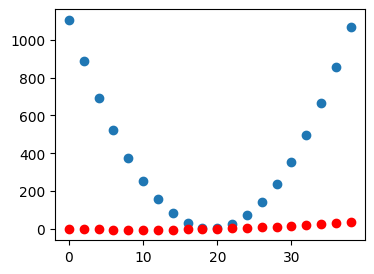

In [ ]:
plot_show(preds)

In [ ]:
#now let me find the second preds since i havent found a new pred
preds = f(params, x)

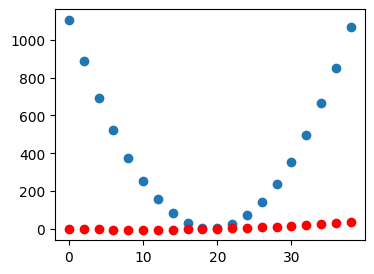

In [ ]:
plot_show(preds)

#lets do this several times instead of ones

In [ ]:
def apply_step(params, prn = True):
  preds = f(params, x)
  loss = mse(preds, y)
  loss.backward()
  lr = 1e-9
  params.data -= params.grad.data*lr
  params.grad = None
  if prn:
    print(loss.item())
  return preds



In [ ]:
for i in range(1000):
  apply_step(params, False)

In [ ]:
params

tensor([ 0.3506, -1.0461,  1.5431], requires_grad=True)

#MNIST LOSS FUNCTION

getting the data from the internet

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)


In [3]:
#We can see what's in this directory by using ls, a method added by fastai
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [4]:
(path/'train').ls()


(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

here's a folder of 3s, and a folder of 7s. In machine learning parlance, we say that "3" and "7" are the labels (or targets) in this dataset. Let's take a look in one of these folders (using sorted to ensure we all get the same order of files):

In [82]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [83]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

Generally when images are floats, the pixel values are expected to be between 0 and 1, so we will also divide by 255 here:



In [84]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [85]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

We need a label for each image. We'll use 1 for 3s and 0 for 7s:



Adding an extra dimension with .unsqueeze(1):

.unsqueeze(1) changes the shape from (2000,) to (2000, 1).
This is often done to make the tensor compatible with models that expect column vectors.
Final shape: (2000,1)

In [86]:
#creating the labels
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)


In [87]:
train_x.shape,train_y.shape


(torch.Size([12396, 784]), torch.Size([12396, 1]))

the above dataset is not enough now we need to find how to combine each x to the respective y, why? because : A Dataset in PyTorch is required to return a tuple of (x,y)  when indexed....so we are gonna use a python function called zip.
zip(train_x, train_y): Combines each image (train_x[i]) with its corresponding label (train_y[i]).
list(...): Turns it into a list of tuples, where each item is (image, label).

In [88]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape,y


(torch.Size([784]), tensor([1]))

In [89]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [90]:
#now lets do the same for validation dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

#Step 1 : Initialize the weight

Now we need an (initially random) weight for every pixel (this is the initialize step in our seven-step process):



In [91]:
def init_params(size, std=1.0) :
  return (torch.randn(size)*std).requires_grad_()



In [92]:
weights = init_params((28*28,1))


In [93]:
bias = init_params(1)


#step 2: calculate predcition

In [94]:
#Lets first calculate the prediction for one image
(train_x[0] * weights.T).sum() + bias


tensor([-2.1550], grad_fn=<AddBackward0>)

In [95]:
#awesome , we got the first prediction for the first role and ofc we cna just run a for loop
#to run through all of this at once , we use matrix_multiplication
def linear1(xb):
  return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -2.1550],
        [ -9.3736],
        [ -2.3300],
        ...,
        [ -3.7351],
        [ -7.3027],
        [-13.7690]], grad_fn=<AddBackward0>)

In [96]:
min(preds)

tensor([-24.0221], grad_fn=<UnbindBackward0>)

#Time to check our accuracy

In [97]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

The accuracy is even worst than chance.

In [98]:
corrects.float().mean().item()

0.6847370266914368

Lets try and change one of the weights slightly and see whats can happen
Now let's see what the change in accuracy is for a small change in one of the weights (note that we have to ask PyTorch not to calculate gradients as we do this, which is what with torch.no_grad() is doing here):

In [99]:
with torch.no_grad():
   weights[0] *= 1.0001


In [100]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.6847370266914368

#STEP 3 : Calculate Loss

In [101]:
def sigmoid(x): return 1/(1+torch.exp(-x))


In [102]:
def mnist_loss(preds, targets):
  preds = preds.sigmoid()
  return torch.where(targets==1, 1-preds, preds).mean()

We want to do a DataLoader class from pytorch and fastai that helps us with shuffle and batch size.

In [103]:
#lets try and play around a bit
ds = L(enumerate(string.ascii_lowercase))
ds


(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [104]:
#if i pass the above to a dataloader, it it going to help wiht shuffling and batch size

d = DataLoader(ds, batch_size=6, shuffle= True)
list(d)

[(tensor([ 9,  5, 11,  3, 16, 17]), ('j', 'f', 'l', 'd', 'q', 'r')),
 (tensor([13,  6, 19, 25, 15, 12]), ('n', 'g', 't', 'z', 'p', 'm')),
 (tensor([ 4, 10, 18,  7,  8, 23]), ('e', 'k', 's', 'h', 'i', 'x')),
 (tensor([ 2, 24, 14,  0, 21, 20]), ('c', 'y', 'o', 'a', 'v', 'u')),
 (tensor([ 1, 22]), ('b', 'w'))]

#PUTTING ALL OF THE ABOVE TOGETHER

I : First, let's re-initialize our parameters

In [105]:
weights = init_params((28*28,1))
bias = init_params(1)

In [106]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

#We'll do the same for the validation set:


In [107]:
valid_dl = DataLoader(valid_dset, batch_size=256)



#Let's create a mini-batch of size 4 for testing:



In [108]:
batch = train_x[:4]


In [109]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [110]:
preds = linear1(batch)
preds

tensor([[-4.1771],
        [ 1.1838],
        [ 2.8419],
        [-2.6722]], grad_fn=<AddBackward0>)

In [111]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5524, grad_fn=<MeanBackward0>)

Now we can calculate the gradients:



In [112]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0114), tensor([-0.0767]))

Let's put that all in a function:



In [113]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [114]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad


(tensor(-0.0229), tensor([-0.1534]))

In [116]:
len(weights.grad)

784